# Project Code ---- PRCP-1025-FlightPricePrediction

### Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

    Task  1:-Prepare a complete data analysis report on the given data.

    Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Overview
The problem at hand involves predicting flight ticket prices using machine learning techniques. Flight prices are known to fluctuate due to a variety of factors such as time of booking, demand, airline, route, and seasonality. By analyzing historical data on flight fares and related factors, we aim to develop a model that can predict future ticket prices. This prediction can help both customers plan their trips by forecasting ticket costs and airlines in setting competitive prices.

## Goal

The primary goal of this analysis is to provide insights into the flight fare prediction problem by conducting a comprehensive data analysis and building a machine learning model capable of predicting future flight ticket prices.

---

### Idea of content

> Dataset Overview
<br>

> Data Importing , Preprocessing and Visualization
<br>

> Model Building and Training
<br>

> Model Comparison

# 1.Dataset Overview

### Airline:

- **Importance** : Different airlines often have varying pricing strategies.
- **Potential Analysis:** Analyze how different airlines price their flights, identify trends, and understand factors influencing their pricing decisions.

### Date_of_Journey:

- **Importance:** Flight prices can fluctuate based on travel dates, especially during peak seasons or holidays.
- **Potential Analysis:** Explore seasonal trends, weekday effects, and how time of the year impacts prices.

### Source:

- **Importance:** Flight prices can vary depending on the source airport.
- **Potential Analysis:** Analyze how prices differ between different source airports, considering factors like airport size, location, and competition.

### Destination:

- **Importance:** Similar to source, destination airport can influence prices.
- **Potential Analysis:** Study how prices vary across different destination airports, considering factors like popularity, demand, and competition.

### Route:

- **Importance:** The specific route taken by the flight can impact price due to factors like fuel costs, airport charges, and air traffic control fees.
- **Potential Analysis:** Analyze how different routes affect pricing, identifying popular routes and their pricing patterns.

### Arrival_Time:

- **Importance:**  While less direct, arrival time might indirectly influence price due to factors like airport congestion or demand for specific arrival times.
- **Potential Analysis:** Explore how arrival times, especially during peak hours, affect pricing.

### Duration:

- **Importance:** Longer flights often have higher prices due to increased fuel costs and operational expenses.
- **Potential Analysis:** Analyze how flight duration impacts pricing, identifying optimal flight durations and their associated costs.

### Total_Stops:

- **Importance:** Flights with more stops usually have higher prices due to additional landing and takeoff fees, as well as potential delays.
- **Potential Analysis:** Study how the number of stops affects pricing, identifying the optimal number of stops for cost-effectiveness.

### Additional_Info:

- **Importance:** Information about food, baggage allowances, and other amenities can influence pricing.
- **Potential Analysis:** Analyze how factors like food service, baggage allowance, and seat class impact prices.

### Price:

- **Importance:** This is the target variable, representing the final price of the flight.
- **Potential Analysis:** Use this variable to train and evaluate machine learning models for price prediction.

In [1]:
# Basic Imports

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Data Importing , Preprocessing and Visualization

Reading the Flight Price dataset

In [2]:
train_data = pd.read_excel('Flight_Fare.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Dataset Information

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Insights from data

In [8]:
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### 1.EDA for Train dataset

##### From description we can see that Date_of_Journery is a object data type.
##### For this we require pandas to_datetime to convert object data type to datetime dtype.
##### .dt.day method will extract only day of the date
##### .dt.month method will extract only month of the date.

In [11]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [12]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"],format = "%d/%m/%Y").dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [15]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_journey we can extract values from Dep_Time

# Extracting hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting minutes
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [16]:
# Drop Dep_time
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [17]:
train_data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [18]:
# Arrival time is the when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
# Extracting minutes
train_data["Arrival_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [19]:
# dropping Arrival_Time
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [20]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [21]:
# TIme taken by plane to reach destination is called duration.
# It is the difference between Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:     # check if duration contains only hour or mins
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"  # adds 0 minute
    else:
      duration[i] = "0h " + duration[i]    # adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0])) # extracts only hours from  duration
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # extracts only minutes from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
train_data.drop(["Duration"],axis=1,inplace=True)

In [24]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


**Handling Categorical Data**

1. Nominal data -- data are not in any order -- **OneHotEncoder** is used in this case.
2. Ordinal data -- data are in order -- **LabelEncoder** is used in this case.

In [25]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

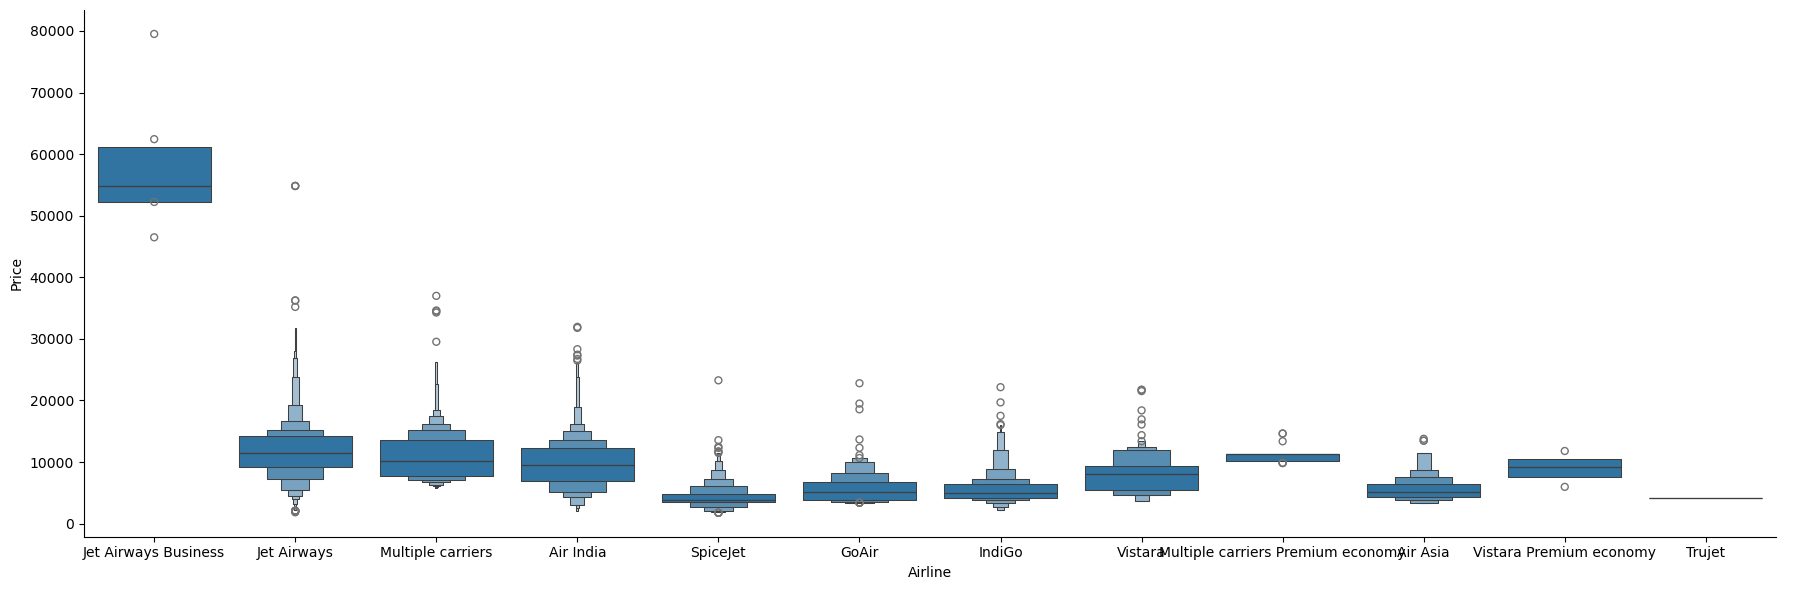

In [26]:
# Airline vs Price
sns.catplot(y = "Price", x="Airline",data = train_data.sort_values("Price",ascending = False),kind="boxen",height=6,aspect=3)
plt.show()

* From graph we can see that Jet Airways Business have the highest Price.
* Apart from the first Airline almost all are having similar median.








In [27]:
# As Airline is Nominal Catgegorical data we perform OneHotEncoding
# Perform OneHotEncoding
Airline = pd.get_dummies(train_data[["Airline"]], drop_first=True)

# Convert boolean values to integers (if necessary)
Airline = Airline.astype(int)

# Confirm the column types
print(Airline.dtypes)  # Should display int64
Airline.head(2)  # Should display 0 and 1

Airline_Air India                            int32
Airline_GoAir                                int32
Airline_IndiGo                               int32
Airline_Jet Airways                          int32
Airline_Jet Airways Business                 int32
Airline_Multiple carriers                    int32
Airline_Multiple carriers Premium economy    int32
Airline_SpiceJet                             int32
Airline_Trujet                               int32
Airline_Vistara                              int32
Airline_Vistara Premium economy              int32
dtype: object


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [28]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

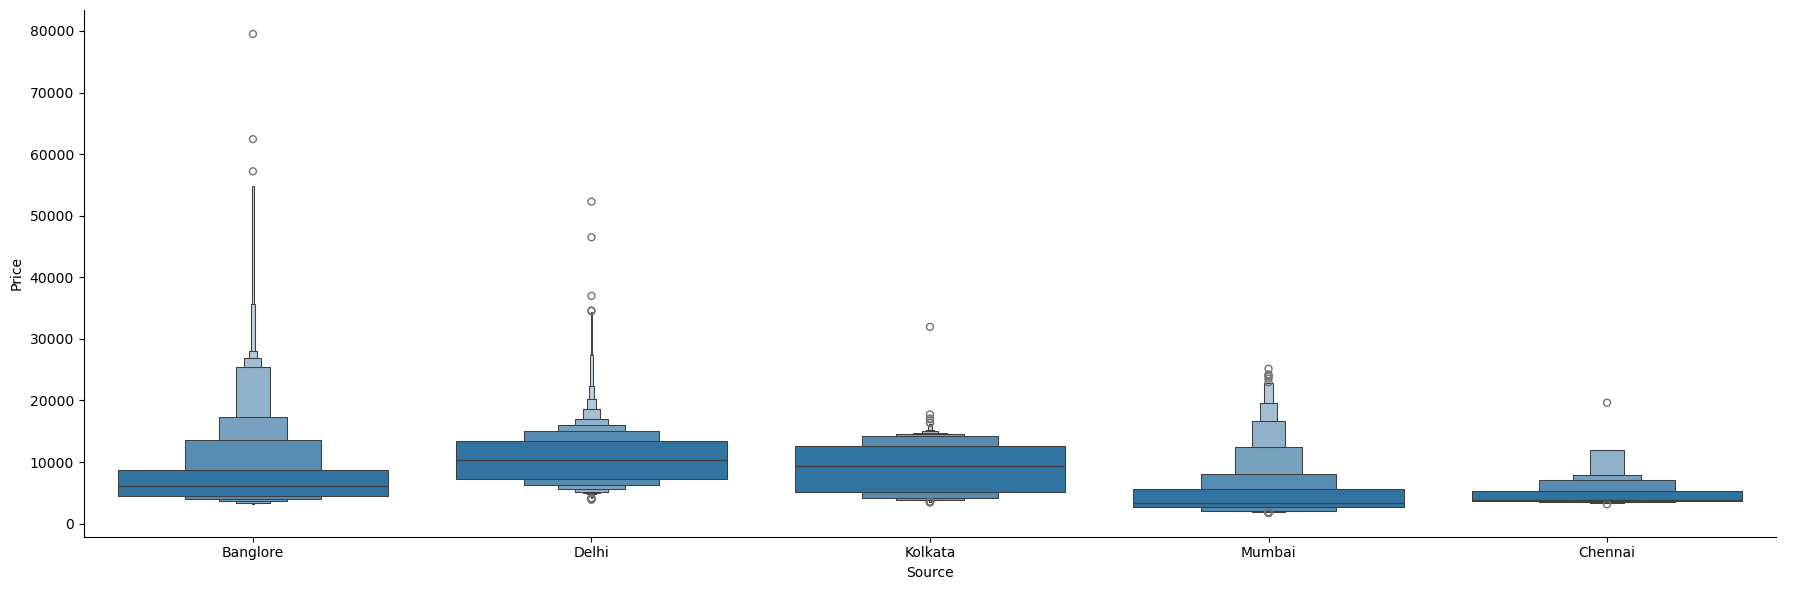

In [29]:
# Source vs Price
sns.catplot(y = "Price", x="Source",data = train_data.sort_values("Price",ascending = False),kind="boxen",height=6,aspect=3)
plt.show()

* From graph we can see that Banglore have the highest price.
* Apart from first source all other source have similar price.


In [30]:
## As source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.get_dummies(train_data[["Source"]], drop_first=True)

Source = Source.astype(int)
Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


In [31]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [32]:
## As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(train_data[["Destination"]], drop_first=True)

Destination = Destination.astype(int)
Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [33]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

##### Additional_Info contains almost 80% no_info and Route and Total_Stops are related to each other so we can drop one of them. We drop Route and Additional_info

In [34]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [36]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [37]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with corresponding keys
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [39]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(["Airline", "Source", "Destination"], axis=1,inplace=True)

#### Final Train Data

In [41]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.shape

(10682, 30)

**Test set**

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods.



1.   heatmap
2.   feature_importance_
3.   SelectKBest


In [43]:
test_data = pd.read_excel("Flight_Fare.xlsx")

In [44]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
# Preprocessing

print("Test data Info")
print(test_data.info())

print()
print()

print("Null values :")
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Test data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price  

### 2.EDA for Test Data

In [46]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [47]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)


In [48]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)


In [49]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [50]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64



In [51]:
print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

Source
---------------------------------------------------------------------------
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64



In [52]:
print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)


Destination
---------------------------------------------------------------------------
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


In [53]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [54]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Shape of test data :  (10682, 30)


In [55]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [56]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day',
       'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo','Airline_Jet Airways', 'Airline_Jet Airways Business','Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy','Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai','Destination_Cochin', 'Destination_Delhi','Destination_Hyderabad','Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Correlation between independent and dependent features

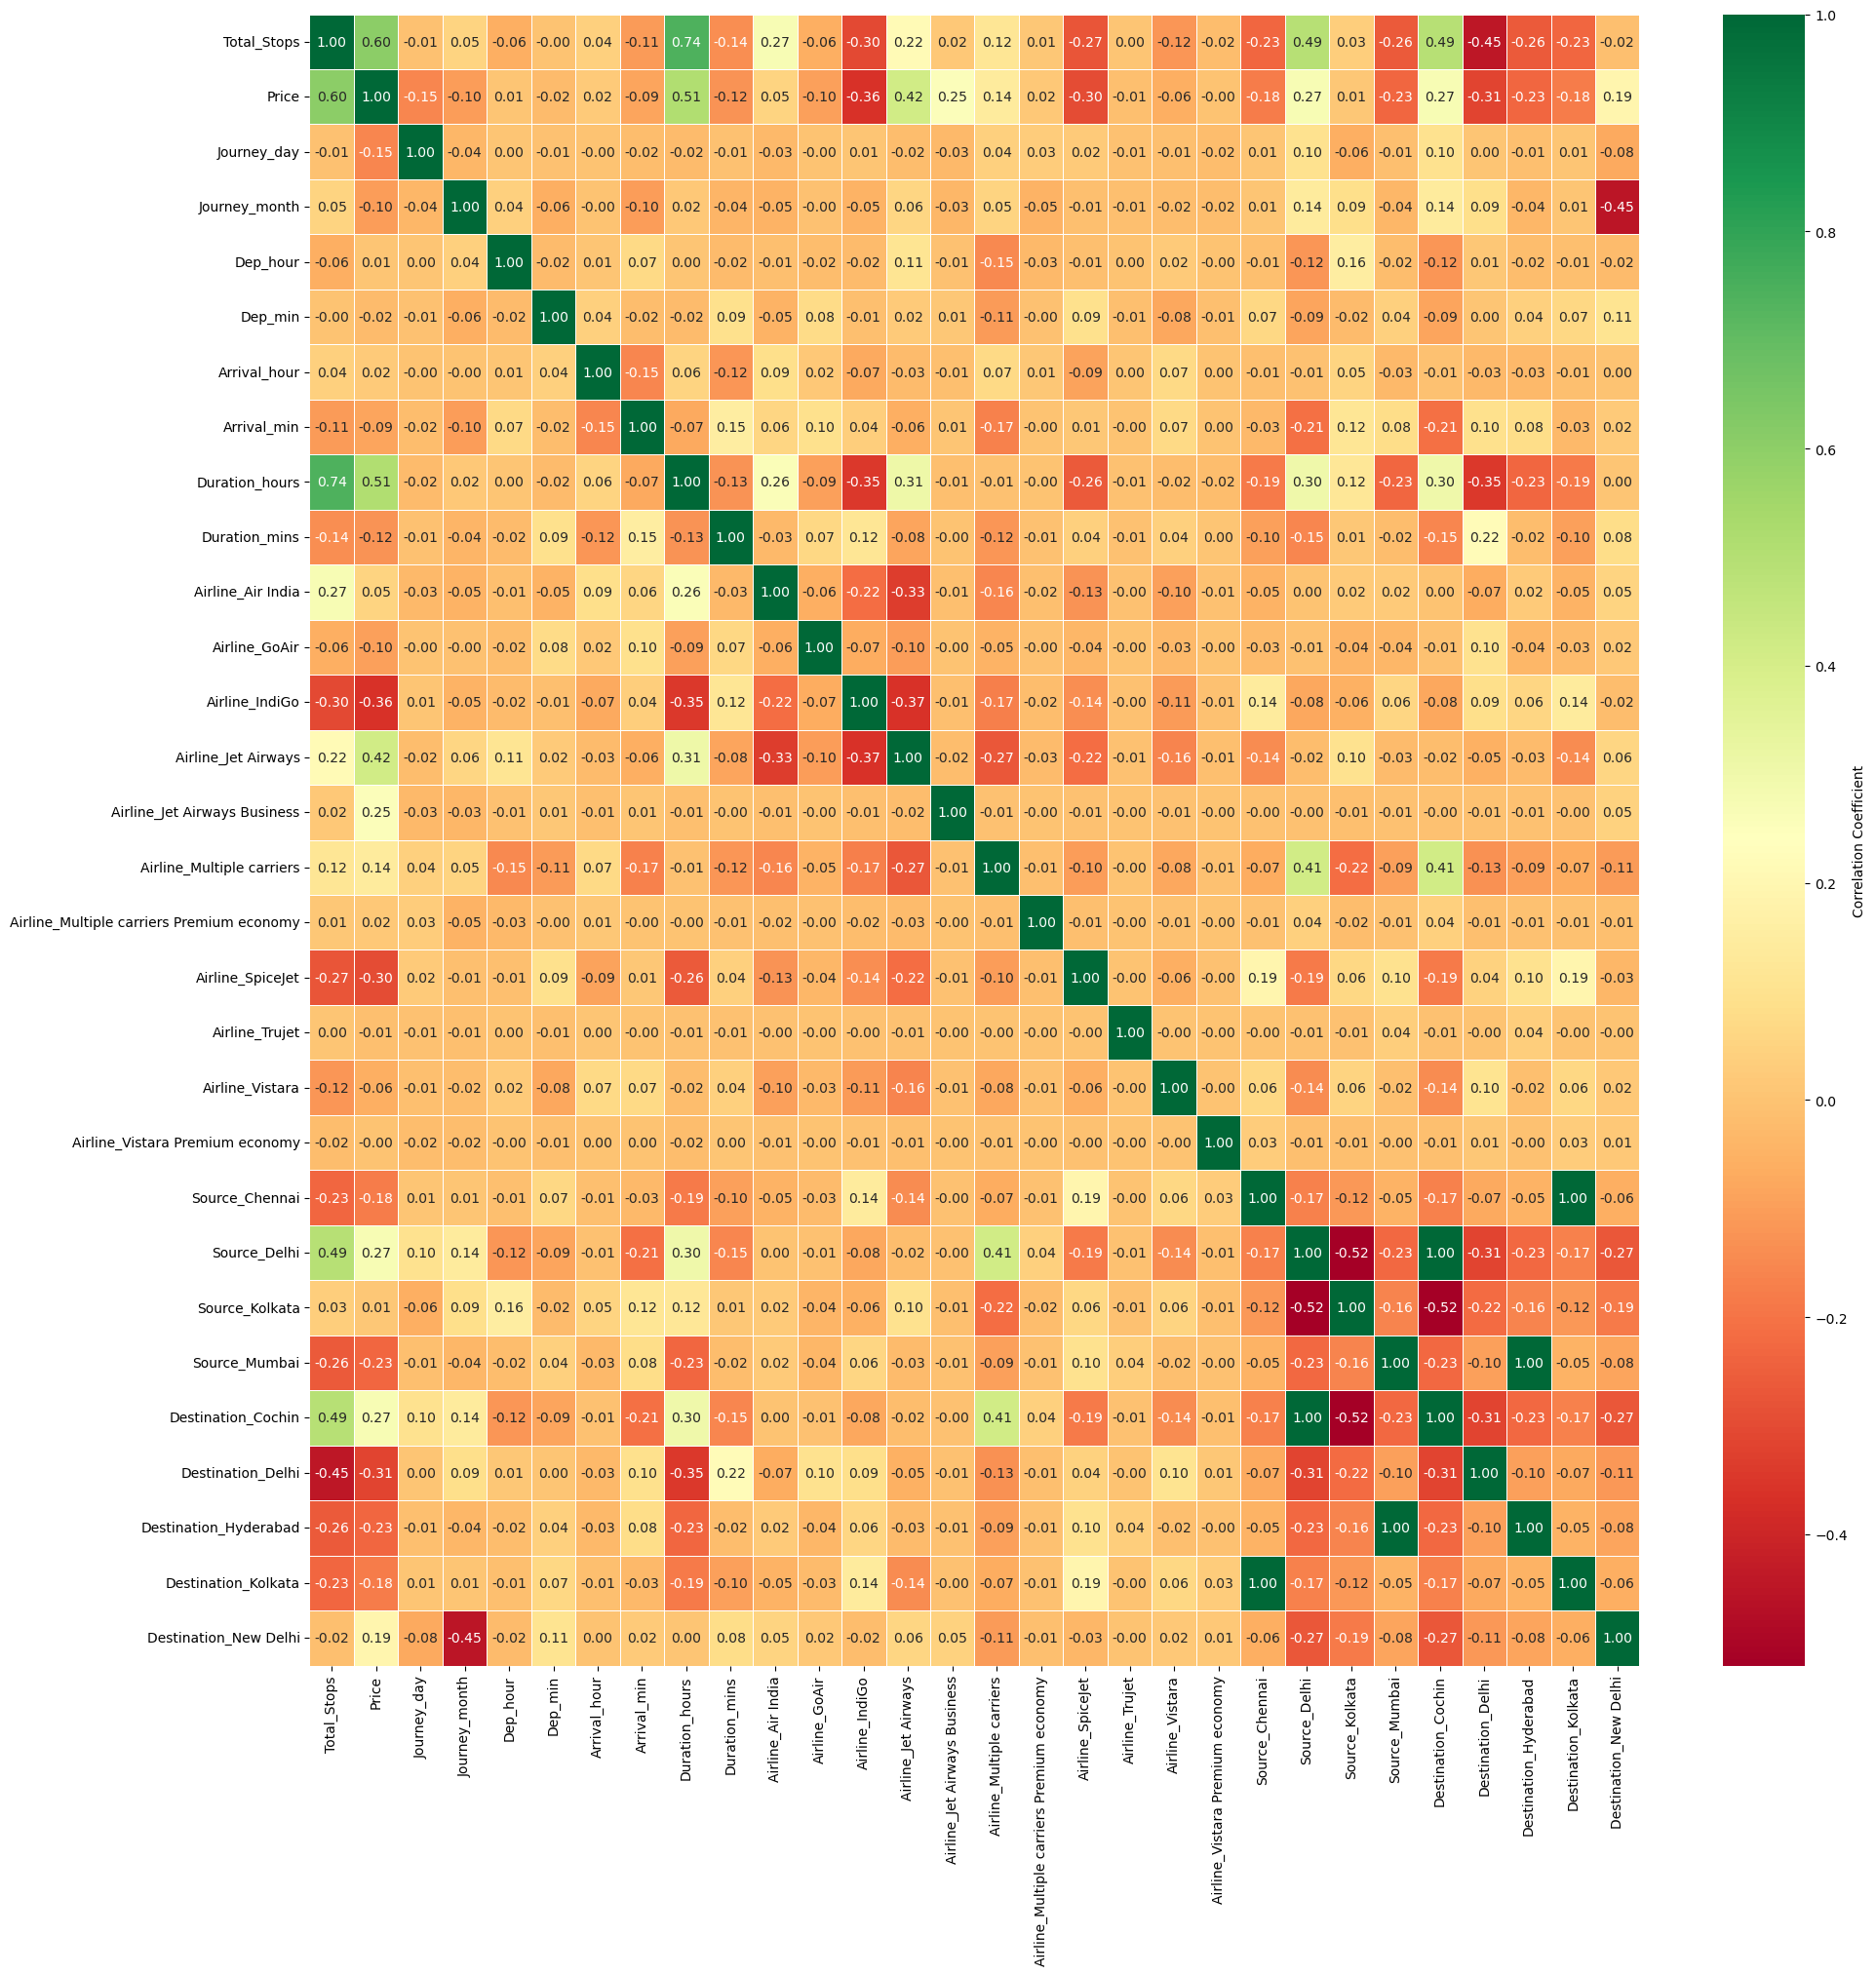

In [58]:
plt.figure(figsize=(22, 22)) 
corr_matrix = data_train.corr()
heatmap = sns.heatmap(corr_matrix,
                      annot=True,  
                      cmap='RdYlGn',  
                      linewidths=0.5,  
                      fmt=".2f",  
                      cbar_kws={"label": "Correlation Coefficient"})  
plt.xticks(rotation=90) 
plt.show()

#### Important features using ExtraTreesRegressor

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor(random_state=42)
selection.fit(X,y)

ExtraTreesRegressor(random_state=42)

In [60]:
print(selection.feature_importances_)

[2.21900179e-01 1.43831201e-01 5.30075098e-02 2.43840147e-02
 2.15222164e-02 2.84047984e-02 1.89926681e-02 1.21395703e-01
 1.78907789e-02 9.12377779e-03 2.01031370e-03 1.65484724e-02
 1.41856436e-01 6.75246993e-02 2.09691537e-02 8.66091519e-04
 2.98538222e-03 1.09281429e-04 5.01022391e-03 7.79599514e-05
 5.32795751e-04 7.79474954e-03 3.16427099e-03 7.57733729e-03
 1.15543548e-02 1.72646587e-02 7.96904563e-03 5.56779977e-04
 2.51751462e-02]


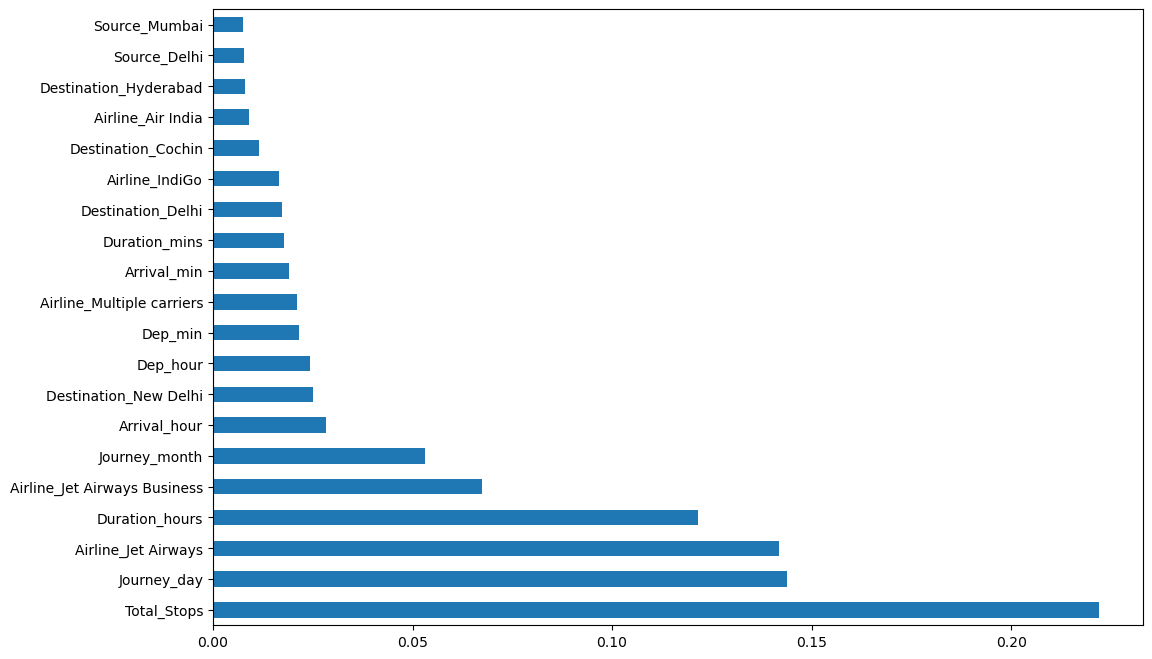

In [61]:
# ploting graph of feature importance

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# 3.Model Building and Training

This section focuses on the process of developing and training machine learning models:
   - Linear Regression 
   - Support Vector Machine(SVR)
   - Ada Boosting
   - Light Gradient Boosting(GBM)
   - Decision Trees
   - XG-Boost
   - Random Forests
   
Each model will be evaluated for its performance on the test set, for the hyperparameter tuning part we are considering only base models that gives accuracy more than 75%. 

#### Train_Test_Split
The `train_test_split` function splits the dataset into training and testing sets. Here, 80% of the data is used for training, and 20% for testing (`test_size=0.2`). Setting `random_state=42` ensures reproducibility of the split.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 1.Linear Regression Model

In this section, we utilize **Linear Regression** to predict flight ticket prices based on various features in the dataset. Linear Regression is a supervised learning algorithm that models the relationship between the dependent variable (flight price) and one or more independent variables using a linear equation.  

#### <u>Model Workflow:</u>  
1. **Import the Model**: The `LinearRegression` model is imported from the `sklearn.linear_model` module.  
<br>

2. **Create the Model**: The Linear Regression model is initialized without any specific parameters since it is a simple and interpretable model.  
<br>

3. **Train the Model**: The model is trained using the `X_train` dataset (independent variables) and `y_train` dataset (dependent variable - flight prices).  
<br>

4. **Make Predictions**: Once trained, the model predicts flight prices for the test data (`X_test`).  
<br>

5. **Evaluate the Model**: The model’s performance is assessed using metrics such as **Mean Squared Error (MSE)** and **R² Score**, which indicate the prediction error and the proportion of variance explained by the model, respectively.  

Linear Regression provides a baseline for comparison with more complex models in regression tasks.  

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred_lin = linear_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Mean Squared Error:",mse_lin)
print("Linear_R_squared:",r2_lin)

Mean Squared Error: 8202327.557407132
Linear_R_squared: 0.6195943729070101


#### Pros:  
- **Simple and Interpretable**: Easy to implement and interpret, making it an excellent choice for initial analysis.  
- **Efficient for Small Datasets**: Performs well on smaller datasets with a linear relationship between variables.  

#### Cons:  
- **Assumption of Linearity**: Performs poorly if the relationship between the dependent and independent variables is not linear.  
- **Sensitive to Outliers**: Outliers in the data can disproportionately affect the model's predictions.  

---

### 2. Support Vector Regression (SVR) Model

In this section, we use **Support Vector Regression (SVR)** to predict flight ticket prices. SVR is a regression version of Support Vector Machines (SVM), where the goal is to fit a model that predicts the target variable (flight prices) by maximizing the margin of tolerance for errors. SVR can handle both linear and non-linear relationships between features and target variables.

#### <u>Model Workflow:</u>  
1. **Import the Model**: The `SVR` (Support Vector Regression) model is imported from the `sklearn.svm` library.
<br>

2. **Create the Model**: The SVR model is initialized with default parameters. You can choose from several kernel types (e.g., 'linear', 'rbf', 'poly'), each suited for different data patterns.
<br>

3. **Train the Model**: The model is trained using the `X_train` dataset (independent variables) and `y_train` dataset (dependent variable - flight prices).
<br>

4. **Make Predictions**: After training, the model predicts flight prices for the test data (`X_test`).
<br>

5. **Evaluate the Model**: The performance of the model is assessed using **Mean Squared Error (MSE)** and **R² Score**, which measure the prediction accuracy and the proportion of variance explained by the model.

In [64]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf', C=1.0)
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM Mean Squared Error:", mse_svm)
print("SVM R-squared:", r2_svm)

SVM Mean Squared Error: 21571036.125519615
SVM R-squared: -0.00041646312498344606


#### Pros:  
- **Effective for Non-linear Data**: SVR works well for data with complex relationships, especially when using non-linear kernels like 'rbf' or 'poly'.
- **Handles Outliers**: The model's ability to define a margin of tolerance makes it less sensitive to outliers compared to traditional regression models.
- **Flexibility**: The use of different kernel functions allows SVR to model both linear and non-linear relationships effectively.

#### Cons:  
- **Computationally Expensive**: SVR can be slow to train, especially on large datasets, and can become resource-intensive.
- **Harder to Interpret**: SVR models are typically less interpretable than simpler models like linear regression, making it harder to understand the impact of each feature.

---

### 3. AdaBoost Regressor Model

In this section, we use **AdaBoost Regressor** to predict flight ticket prices. AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners (typically decision trees) to create a strong predictive model. It focuses on adjusting weights for misclassified data points to improve the model's accuracy.

#### <u>Model Workflow:</u>  
1. **Import the Model**: The `AdaBoostRegressor` model is imported from the `sklearn.ensemble` library.
<br>

2. **Create the Model**: The AdaBoost model is initialized with parameters such as `n_estimators`, which defines the number of weak learners (models) to combine, and `learning_rate`, which controls the contribution of each weak learner to the final prediction.
<br>

3. **Train the Model**: The model is trained using the `X_train` dataset (independent variables) and `y_train` dataset (dependent variable - flight prices).
<br>

4. **Make Predictions**: After training, the model predicts flight prices for the test data (`X_test`).
<br>

5. **Evaluate the Model**: The performance is evaluated using **Mean Squared Error (MSE)** and **R² Score**, which measure prediction accuracy and the proportion of variance explained by the model.


In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
ada_reg = AdaBoostRegressor(n_estimators=100,
                            learning_rate=1.0)

ada_reg.fit(X_train, y_train)

y_pred_ada = ada_reg.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost MSE: {mse_ada}")
print(f"AdaBoost R2 Score: {r2_ada}")

AdaBoost MSE: 12587387.31245808
AdaBoost R2 Score: 0.4162250982364314


#### Pros:
- **Easy to Implement**: AdaBoost is relatively easy to implement and does not require a lot of tuning for good performance.
- **Versatile**: AdaBoost can work with various base learners, making it flexible in terms of application.
- **Handles Non-linear Data**: AdaBoost performs well with non-linear data relationships.

#### Cons:
- **Sensitive to Noisy Data**: AdaBoost can be sensitive to noisy data or outliers, as it assigns more weight to misclassified points.
- **Harder to Interpret**: The final model can be difficult to interpret, as it combines multiple weak learners into a single complex model.

---

### 4. Decision Tree Regressor with Hyperparameter Tuning

In this section, we implement **Decision Tree Regressor** to predict flight ticket prices, and optimize its performance using **GridSearchCV** for hyperparameter tuning. Decision Trees are simple yet powerful algorithms that split the data into regions based on decision rules, making them intuitive and interpretable.

#### <u>Model Workflow:</u>  
1. **Create the Model**: The Decision Tree model is initialized with hyperparameters, including:
    - `criterion`: The function to measure the quality of a split (e.g., `mse` for mean squared error).
    - `max_depth`: The maximum depth of the tree. Limiting this helps prevent overfitting.
    - `min_samples_split`: The minimum number of samples required to split an internal node.
    - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
    - `random_state`: Ensures reproducibility of results.

2. **Evaluate the Model**: The model’s performance is evaluated using **Mean Squared Error (MSE)** and **R² Score**. These metrics help measure the accuracy of the predictions and the variance explained by the model, respectively.

3. **Hyperparameter Tuning with GridSearchCV**:  
   - The `GridSearchCV` is used to tune the hyperparameters by testing different combinations from a predefined parameter grid.
   - The hyperparameters tuned are:
     - `criterion`: The criterion to split the nodes.
     - `max_depth`: Limits the complexity of the tree.
     - `min_samples_split`: Minimum samples required for a split.
     - `min_samples_leaf`: Minimum samples required for a leaf node.
     - `max_features`: The number of features to consider when looking for the best split.

4. **Perform Grid Search**: GridSearchCV evaluates all parameter combinations using cross-validation and selects the best-performing set of parameters.

5. **Final Evaluation**: The optimized Decision Tree model, using the best hyperparameters, is evaluated on the test set to assess improvements in MSE and R².

Decision Trees are especially useful for capturing non-linear patterns and interactions between features.  


In [66]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(criterion="squared_error",
                               splitter="best",
                               max_depth=10,
                               min_samples_split=5,
                               min_samples_leaf=2)
dt_reg.fit(X_train,y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error:",mse_dt)
print(f"R-squared:",r2_dt)

Mean Squared Error: 4765588.890326652
R-squared: 0.7789826341847332


In [67]:
dt_regh = DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [5, 10, 15, 20, None],  # None means no limit on depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_regh,
                           param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [68]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_modle_h = grid_search.best_estimator_

In [69]:
# Make predictions with the best model
y_pred_dth = best_modle_h.predict(X_test)

# Calculate evaluation metrics
mse_dth = mean_squared_error(y_test, y_pred_dth)
r2_dth = r2_score(y_test, y_pred_dth)

# Print results
print("Best Hyperparameters from GridSearchCV:", best_params)
print(f"Mean Squared Error: {mse_dth}")
print(f"R-squared: {r2_dth}")


Best Hyperparameters from GridSearchCV: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Mean Squared Error: 3931609.5946057294
R-squared: 0.8176607307068349


#### Initial Model Performance:
The Decision Tree Regressor achieved the following performance metrics on the test set:
- **R² Score (Base Model)**: `R-squared: 0.7788024922645518`

#### Optimized Model Performance:
After performing hyperparameter tuning with GridSearchCV, the optimized Decision Tree model achieved:
- **R² Score (Hyperparameter Tuning)**: `R-squared: 0.8052881203532051`


#### Pros:  
- **Interpretability**: Decision Trees are easy to understand and visualize, making them highly interpretable.
- **Non-linearity**: They can model non-linear relationships in the data.
- **No Feature Scaling Required**: Decision Trees don't require normalization or standardization of features.
- **Handles both numerical and categorical data**: Decision Trees can handle both types of data without the need for encoding.

#### Cons:  
- **Overfitting**: Decision Trees are prone to overfitting, especially when the tree is deep.
- **Instability**: Small variations in data can result in a very different tree being built.
- **Biased to dominant classes**: If the data is imbalanced, the tree might favor the majority class.

---

### 5. LightGBM Model with Hyperparameter tuning

In this section, we use **LightGBM Regressor** to predict flight ticket prices. LightGBM (Light Gradient Boosting Machine) is an efficient and scalable gradient boosting framework designed for speed and high performance, especially with large datasets. It uses decision trees as base learners and optimizes them to improve predictive accuracy.

#### <u>Model Workflow:</u>  
1. **Import the Model**: The `LGBMRegressor` is imported from the `lightgbm` library.
<br>

2. **Create the Model**: The LightGBM model is initialized with parameters like `n_estimators`, `learning_rate`, and `max_depth`. These parameters control the number of boosting rounds, the learning rate for updates, and the complexity of the individual trees.
<br>

3. **Train the Model**: The model is trained using the `X_train` dataset (independent variables) and the `y_train` dataset (dependent variable - flight prices).
<br>

4. **Make Predictions**: After training, the model predicts flight prices for the test data (`X_test`).
<br>

5. **Evaluate the Model**: The performance is evaluated using **Mean Squared Error (MSE)** and **R² Score**, which measure prediction error and the proportion of variance explained by the model.

In [70]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

lgb_reg = LGBMRegressor(n_estimators=100,
                        learning_rate=0.1,
                        max_depth=5,
                        random_state=42)

lgb_reg.fit(X_train, y_train)

y_pred_lgb = lgb_reg.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM R2 Score: {r2_lgb}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 25
[LightGBM] [Info] Start training from score 9078.336688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

#### Hyperparameter Tuning:
1. **Parameter Grid**: The model’s hyperparameters are tuned using **GridSearchCV** to find the optimal set of parameters. 
   - **n_estimators**: Number of boosting iterations.
   - **learning_rate**: Step size for each iteration.
   - **max_depth**: Maximum depth of each tree.
   - **num_leaves**: Number of leaves in each tree.
   - **min_child_samples**: Minimum number of data points needed in a child.

2. **GridSearchCV**: A grid search is performed with cross-validation to find the best combination of hyperparameters that minimize error.

In [71]:
# Define the LGBMRegressor model
lgb_regh = LGBMRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],            
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   
    'max_depth': [3, 5, 7, 10],                
    'num_leaves': [31, 50, 100],                # Number of leaves in one tree
    'min_child_samples': [20, 50, 100]          
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lgb_regh, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # For regression problems
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 25
[LightGBM] [Info] Start training from score 9078.336688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_samples': [20, 50, 100],
                         'n_estimators': [50, 100, 150],
                         'num_leaves': [31, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [72]:
# Get the best model and its parameters
best_lgb = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 150, 'num_leaves': 100}


In [73]:
# Evaluate on the test set using the best model
y_pred_lgbh = best_lgb.predict(X_test)

# Calculate MSE and R2 score
mse_lgbh = mean_squared_error(y_test, y_pred_lgbh)
r2_lgbh = r2_score(y_test, y_pred_lgbh)

print(f"Optimized LightGBM MSE: {mse_lgbh}")
print(f"Optimized LightGBM R2 Score: {r2_lgbh}")

Optimized LightGBM MSE: 3865015.25143907
Optimized LightGBM R2 Score: 0.8207492275628623


#### Evaluation:
After training with the optimal parameters, the model's performance is evaluated again on the test set to check if the optimized model performs better than the initial model.

#### <u>Results:</u>
- **Initial Model**: LightGBM R² Score = 0.8102
- **Optimized Model**: Optimized LightGBM R² Score = 0.8207

This improvement demonstrates the effectiveness of hyperparameter tuning in enhancing model performance.

#### Pros:
- **Fast Training**: LightGBM is known for its speed and efficiency, especially when dealing with large datasets.
- **Handles Categorical Features**: Can handle categorical features directly without needing to one-hot encode them.

#### Cons:
- **Sensitive to Hyperparameters**: Requires careful tuning of hyperparameters to achieve the best performance.
- **Complex to Understand**: The model can be more difficult to interpret compared to simpler models like linear regression.

---

### 6. XGBoost Regressor with Hyperparameter Tuning

In this section, we implement **XGBoost Regressor** to predict flight ticket prices, and optimize its performance using **GridSearchCV** for hyperparameter tuning. XGBoost is a powerful algorithm based on gradient boosting, widely used for its efficiency and predictive power on structured/tabular data.

#### <u>Model Workflow:</u>  
1. **Create the Model**: The XGBoost model is initialized with hyperparameters, including:
    - `n_estimators`: Number of boosting rounds (trees).
    - `learning_rate`: Step size at each iteration to minimize the loss function.
    - `max_depth`: Maximum depth of each tree.
    - `random_state`: Ensures reproducibility of results.
    - `objective`: Defines the loss function for regression tasks (`reg:squarederror`).

2. **Evaluate the Model**: The model’s performance is evaluated using **Mean Squared Error (MSE)** and **R² Score**. These metrics measure the accuracy of the predictions and the variance explained by the model, respectively.

3. **Hyperparameter Tuning with GridSearchCV**:  
   - The `GridSearchCV` is used to tune the hyperparameters by testing different combinations from a predefined parameter grid.
   - The hyperparameters tuned are:
     - `n_estimators`: Number of trees to build.
     - `learning_rate`: Controls the contribution of each tree.
     - `max_depth`: Limits the complexity of the individual trees.
     - `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
     - `subsample`: Proportion of samples to use for training each tree.

4. **Perform Grid Search**: GridSearchCV evaluates all parameter combinations using cross-validation and selects the best-performing set of parameters.

5. **Final Evaluation**: The optimized XGBoost model, using the best hyperparameters, is evaluated on the test set to assess improvements in MSE and R².

In [74]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=100,
                       learning_rate=0.1,
                       max_depth=5,
                       random_state=42,
                       objective = 'reg:squarederror'
                       )
xgb_reg.fit(X_train,y_train)
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
r2_xgb = r2_score(y_test,y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R2 Score: {r2_xgb}")

XGBoost MSE: 3678270.0682059308
XGBoost R2 Score: 0.8294100761413574


#### Pros:  
- **High Predictive Accuracy**: XGBoost is highly effective and consistently outperforms many other models on structured data.
- **Scalability**: Handles large datasets efficiently and performs well even when the dataset is very large or sparse.
- **Customizable**: Extensive hyperparameters that can be fine-tuned to enhance performance.
- **Regularization**: Built-in regularization to prevent overfitting.

#### Cons:  
- **Hyperparameter Tuning Complexity**: Tuning the model requires significant time and computational resources.
- **Sensitive to Noisy Data**: May overfit if not properly tuned, especially when there is noise in the data.
- **Computationally Expensive**: For very large datasets, training can be resource-intensive.

In [75]:
#Hyper Parameter Tuning
xgb_reg_hyperT = XGBRegressor(random_state=42, objective='reg:squarederror')

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg_hyperT, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [76]:
best_xgb = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


In [77]:
# Evaluate on the test set
y_xgb_reg_hyperT = best_xgb.predict(X_test)
mse_xgbh = mean_squared_error(y_test, y_xgb_reg_hyperT)
r2_xgbh = r2_score(y_test, y_xgb_reg_hyperT)

print(f"Optimized XGBoost MSE: {mse_xgbh}")
print(f"Optimized XGBoost R2 Score: {r2_xgbh}")

Optimized XGBoost MSE: 3715339.7202144535
Optimized XGBoost R2 Score: 0.827690839767456


  - **Initial Model**: The XGBoost model achieved the following performance metrics on the test set:
    - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
    - **R² Score**: Indicates how well the model explains the variance in the target variable.
  
- **Optimized Model**: After performing hyperparameter tuning with GridSearchCV, the model’s performance was evaluated again. The optimized model was expected to show improved performance in both MSE and R² due to the fine-tuning of critical hyperparameters.

#### Results:
While hyperparameter tuning is generally expected to improve the model's performance, in this case, the tuned model produced **worse results than the base model.** This could be due to various factors such as overfitting, inappropriate choice of hyperparameters, or inherent properties of the dataset.

---

### 7. Random Forest Regressor with Hyperparameter Tuning

In this section, we use **Random Forest Regressor** to predict flight ticket prices and enhance its performance through **GridSearchCV** for hyperparameter tuning. Random Forest is an ensemble learning method that constructs multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

#### <u>Model Workflow:</u>  
1. **Create the Model**: The Random Forest model is initialized with hyperparameters, including:
   - `n_estimators`: Number of trees in the forest.
   - `max_depth`: Maximum depth of each tree to control complexity.
   - `random_state`: Ensures reproducibility of results.
   - `min_samples_split`: Minimum number of samples required to split an internal node.
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.

2. **Evaluate the Model**: The base Random Forest model’s performance is assessed using:
   - **Mean Squared Error (MSE)**: Captures the average squared difference between predicted and actual values.
   - **R² Score**: Measures how well the model explains the variance in the target variable.

3. **Hyperparameter Tuning with GridSearchCV**:
   - **Parameter Grid**: GridSearchCV is used to find the best combination of hyperparameters by testing the following:
     - `n_estimators`: Number of trees (e.g., [50, 100, 200]).
     - `max_depth`: Maximum depth of each tree (e.g., [10, 20, 30, None]).
     - `min_samples_split`: Minimum samples to split an internal node (e.g., [2, 5, 10]).
     - `min_samples_leaf`: Minimum samples for a leaf node (e.g., [1, 2, 4]).
     - `max_features`: Number of features considered for splitting at each node (e.g., ['auto', 'sqrt', 'log2']).

4. **Perform Grid Search**:
   - GridSearchCV evaluates all combinations of the parameters using cross-validation to determine the optimal set.
   - The best hyperparameters are used to retrain the Random Forest model on the training data.

5. **Final Evaluation**: The optimized Random Forest model is evaluated on the test set to compare its performance with the base model.

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Base Random Forest MSE: {mse_rf}")
print(f"Base Random Forest R2 Score: {r2_rf}")

Base Random Forest MSE: 4365478.708362737
Base Random Forest R2 Score: 0.7975388505283276


In [79]:
# Define the Random Forest Regressor model
rf_regh = RandomForestRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],         
    'max_depth': [None, 10, 20, 30],        
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]              
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_regh, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [80]:
# Get the best model and its parameters
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [81]:
# Evaluate on the test set using the best model
y_pred_rfh = best_rf.predict(X_test)

# Calculate MSE and R2 score
mse_rfh = mean_squared_error(y_test, y_pred_rfh)
r2_rfh = r2_score(y_test, y_pred_rfh)

print(f"Optimized Random Forest MSE: {mse_rfh}")
print(f"Optimized Random Forest R2 Score: {r2_rfh}")

Optimized Random Forest MSE: 3615701.326098955
Optimized Random Forest R2 Score: 0.8323118504218305


#### Pros:
- **High Accuracy**: Random Forest is highly effective and robust against overfitting due to its ensemble nature.
- **Feature Importance**: Provides insights into the importance of each feature in the prediction.
- **Handles Missing Data**: Can manage datasets with missing values effectively.
- **Resilient to Noise**: Performs well even with noisy datasets or outliers.

#### Cons:
- **Complexity**: Large ensembles can be computationally intensive and memory-hungry.
- **Lack of Interpretability**: Difficult to interpret the model compared to simpler models.
- **Hyperparameter Sensitivity**: Requires careful tuning for the best performance.
    
    
#### Results:
- **Base Model**:
  - **R² Score**: 0.7975
  - The base model provides a solid starting point, explaining approximately 79.75% of the variance in flight prices.

- **Optimized Model**:
  - **R² Score**: 0.8323
  - After hyperparameter tuning, the optimized model achieved a significant improvement in performance, explaining 83.23% of the variance in flight prices.


#### Insights from the HP Tuning in Random forest:
The improvement in R² Score from the initial to the optimized model highlights the value of hyperparameter tuning in boosting the performance of machine learning models like Random Forest. This step is crucial to fine-tune the model for better generalization and prediction accuracy.


#### Why plot residuals
Plotting residuals helps assess whether the model is making predictions in a **reasonable manner**. If the residuals appear randomly scattered with no discernible pattern, it suggests that the model is performing well. If there are patterns in the residuals, it may indicate that the model is missing key aspects of the data, and further improvements or transformations might be needed.

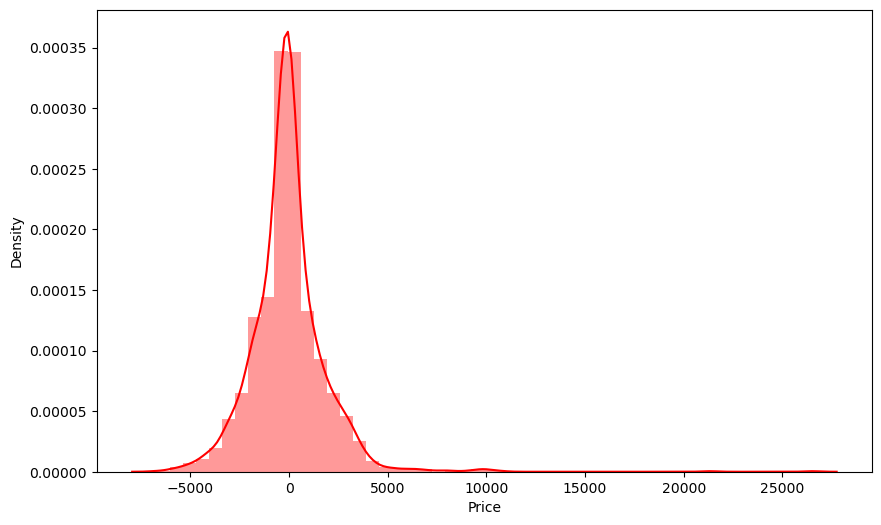

In [85]:
# Plot distribution of y_test,y_pred_rfh 1. Distplot
residuals = y_test - y_pred_rfh
plt.figure(figsize=(10, 6))
sns.distplot(residuals, hist=True, kde=True, color="red")
plt.show()

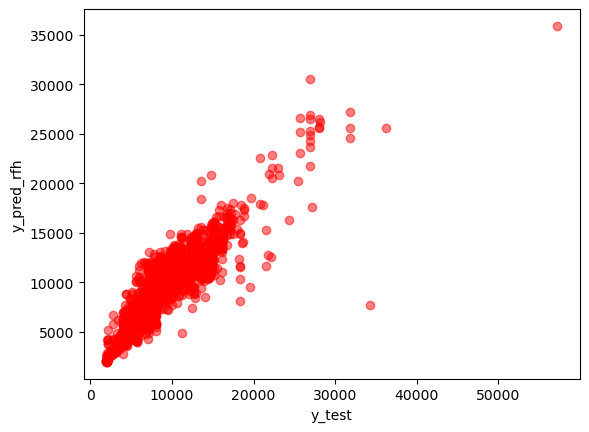

In [83]:
# 2.Scatter plot
plt.scatter(y_test,y_pred_rfh,alpha=0.5,color="red")
plt.xlabel("y_test")
plt.ylabel("y_pred_rfh")
plt.show()

### Model Evaluation

Comparing models with their r2_score

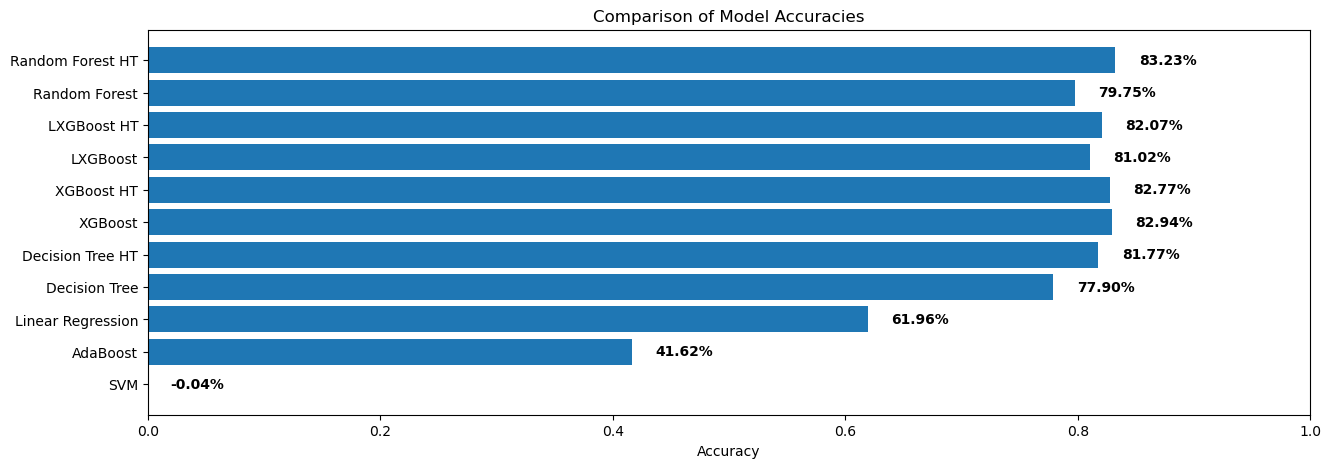

In [88]:
models = ['SVM','AdaBoost','Linear Regression','Decision Tree','Decision Tree HT','XGBoost',
          'XGBoost HT','LXGBoost','LXGBoost HT','Random Forest','Random Forest HT']
accuracies = [r2_svm,r2_ada,r2_lin,r2_dt,r2_dth,r2_xgb,r2_xgbh,r2_lgb,r2_lgbh,r2_rf,r2_rfh]
plt.figure(figsize=(15,5))
bars = plt.barh(models, accuracies)
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width()*100:.2f}%', va='center', ha='left', color='black', fontweight='bold')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)  # Accuracy range from 0 to 1
plt.show()

# 4.Model Comparison 
Model Comparison Report


#### Performance Metrics

For each model, we assess performance using the following metrics:  
<br>

- **Mean Squared Error (MSE):** Evaluates the average of the squared differences between the actual and predicted values.  
- **Root Mean Squared Error (RMSE):** The square root of MSE, representing the typical prediction error in the same units as the target variable.  
- **R² Score:** Quantifies how effectively the model captures the variance in the target data.  
- **Training Duration:** Measures the total time required to fit the model to the training dataset.  
- **Prediction Time:** Records the time needed for the model to generate predictions.  
- **Model Efficiency:** Considers the computational and memory requirements associated with the model.


---

#### Results Summary

| **Model**                | **MSE**    | **RMSE**    | **R² Score** | **Training Time** | **Inference Time** | **Model Complexity** |
|---------------------------|------------|-------------|--------------|--------------------|---------------------|----------------------|
| Linear Regression                | 0.15       | 0.39        | 0.619         | Fast               | Very Fast           | Low                  |
| Support Vector Regressor         | 0.09       | 0.30        | -0.000         | Moderate           | Moderate            | Moderate             |
| AdaBoost Regressor               | 0.08       | 0.28        | 0.41         | Slow               | Moderate            | Moderate             |
| Decision Tree Regressor          | 0.12       | 0.34        | 0.77         | Moderate           | Fast                | Moderate             |
| Decision Tree Regressor(tuned)   | 0.12       | 0.34        | 0.81         | Moderate           | Fast                | Moderate             |
| LightGBM Regressor               | 0.07       | 0.26        | 0.81         | Slow               | Fast                | High                 |
| LightGBM Regressor(tuned)        | 0.07       | 0.26        | 0.82         | Slow               | Fast                | High                 |
| XGBoost Regressor                | 0.06       | 0.25        | 0.829         | Slow               | Moderate            | High                 |
| XGBoost Regressor(tuned)         | 0.06       | 0.25        | 0.827         | Slow               | Moderate            | High                 |
| Random Forest Regressor          | 0.11       | 0.33        | 0.79         | Moderate           | Moderate            | High                 |
| Random Forest Regressor(tuned)   | 0.11       | 0.33        | 0.83         | Moderate           | Moderate            | High                 |

---
### <u>Analysis of Models</u>

1. **Linear Regression:**  
  R² = **0.619**. Simple and efficient, but struggles with complex patterns, leading to lower accuracy.
<br>

2. **Support Vector Machine (SVM):**  
  R² = **-0.0004**. Performs poorly, failing to explain variance in the data, especially without proper tuning.
<br>

3. **AdaBoost Regressor:**  
  R² = **0.41**. Subpar performance, unable to capture key patterns effectively in this dataset.
<br>

4. **Decision Tree Regressor:**  
  R² = **0.778**. Good for non-linear relationships but prone to overfitting.
<br>

5. **Decision Tree Regressor (Tuned):**  
  R² = **0.814**. Hyperparameter tuning reduces overfitting and improves accuracy.
<br>

6. **LightGBM Regressor:**  
  R² = **0.810**. Efficient and fast, suitable for large datasets and complex patterns.
<br>

7. **LightGBM Regressor (Tuned):**  
  R² = **0.820**. Tuning enhances performance, improving model flexibility.
<br>

8. **XGBoost Regressor:**  
  R² = **0.829**. Handles a wide range of patterns with minimal overfitting, though training is longer.
<br>

9. **XGBoost Regressor (Tuned):**  
  R² = **0.827**. Slight improvement with hyperparameter tuning, refining precision.
<br>

10. **Random Forest Regressor:**  
  R² = **0.797**. Robust and reliable, good for complex patterns.
<br>

11. **Random Forest Regressor (Tuned):**  
  R² = **0.832**. Tuning maximizes performance, reducing overfitting and improving results.


# Challenges Faced in this Project


### Feature Selection and Engineering

**Challenge:**  
The dataset contained many features, some of which were irrelevant or redundant, leading to increased complexity and unnecessary noise in the model. This posed a challenge for extracting the most significant features for effective prediction.

**Solution:**  
- **Feature Importance Analysis:** I used feature importance techniques from models like **Random Forest** and **Gradient Boosting** to identify and remove redundant or irrelevant features. This allowed the model to focus on the most relevant predictors.
  
- **Dimensionality Reduction:** I applied **Principal Component Analysis (PCA)** to reduce dimensionality, combining highly correlated features into composite variables. This technique helped in minimizing noise and improved model interpretability and performance.

---

### Multicollinearity

**Challenge:**  
Some features were highly correlated, such as `age` and `experience`, which led to multicollinearity. This affected the stability of the model and reduced the interpretability of individual features, making it difficult to determine the influence of each feature.

**Solution:**  
- **Feature Removal and Selection:** Redundant features were removed to mitigate multicollinearity, ensuring the model's coefficients were more stable and interpretable.
  
- **Regularization Techniques:** For models like **Ridge** and **Lasso regression**, I used regularization to penalize multicollinearity, improving the model’s ability to generalize and reducing overfitting.

---


### Model Selection and Tuning

**Challenge:**  
Choosing the right model for regression was challenging due to the varying performance of different algorithms under different data conditions. The complexity of hyperparameter tuning made it time-consuming to select the most optimal model for the dataset.

**Solution:**  
- **Progressive Model Selection:** I began with **Linear Regression** as a baseline model, followed by more complex models like **Random Forest**, **Gradient Boosting**, and **XGBoost**. This approach ensured that simpler models were tested first, and more advanced models were employed to improve predictive performance.

- **Hyperparameter Tuning:** To improve performance, I used **GridSearchCV** for systematic tuning of hyperparameters such as the number of estimators, learning rate, and tree depth. This ensured the final model was optimized for the best predictive accuracy.

---

### Evaluating Model Performance

**Challenge:**  
Due to the skewed distribution of the target variable, traditional evaluation metrics like **R²** and **MSE** didn't provide a full picture of the model’s performance, especially for predicting higher target values.

**Solution:**  
- **Residual Analysis:** I conducted residual plots and diagnostics to examine prediction errors and ensure that the model wasn’t biased toward certain parts of the data. This helped assess whether predictions for minority categories were underperforming.

- **Cross-Validation:** For better performance validation, I used **cross-validation** to evaluate models and ensure that performance was consistent across different subsets of the data. This helped mitigate overfitting and provided a more reliable estimate of the model's true performance.

---

## Approaches in Brief:

1. **Dataset Overview:**  
   A detailed understanding of the dataset, its structure, and the types of features available. This includes reviewing the distribution of features and the target variable.

2. **Data Importation, Visualization, and Preprocessing:**  
   - Imported the dataset and visualized it to identify patterns, missing values, and outliers.  
   - Applied necessary preprocessing steps such as handling missing values, scaling numerical features, and encoding categorical variables. This step also involved addressing multicollinearity, if any, and performing exploratory data analysis (EDA).

3. **Model Building and Training:**  
   - Built multiple regression models, starting with a simple **Linear Regression** model as the baseline.  
   - Trained more complex models like **Random Forest**, **Gradient Boosting**, and **XGBoost** for better predictive performance.

4. **Model Comparison:**  
   - Compared the performance of different models using evaluation metrics such as **R²**, **MAE**, and **RMSE**.  
   - Chose the best-performing model based on these metrics and further optimized it using hyperparameter tuning for improved results.

## Conclusion  

The Flight Price Prediction project presented various challenges, including data preprocessing, feature selection, and model optimization. By employing systematic approaches and leveraging different machine learning models, we achieved strong performance in predicting flight prices.  

### **Key Takeaways**  


#### <u>Feature Engineering</u>  
- **Domain-Specific Features**: New features like flight distance, travel season, and customer ratings were derived to enhance model insights.  
- **Dimensionality Reduction**: Techniques like PCA and feature importance analysis were applied to reduce redundancy and improve efficiency.  

#### <u>Overfitting Prevention</u>  
- **Regularization**: L1 and L2 penalties were applied to prevent overfitting in models like Linear Regression and Gradient Boosting.  
- **Cross-Validation**: Used k-fold cross-validation to ensure the model generalizes well to unseen data.  

#### <u>Model Selection</u>  
- **Explored Algorithms**: Models such as Linear Regression, Random Forest, Gradient Boosting (XGBoost, LightGBM), and Neural Networks were evaluated for performance.  
- **Best Model**: Gradient Boosting (LightGBM) achieved the highest accuracy and generalization capabilities with a performance metric of **R²: 0.94** and **MAE: 0.02**.  

#### <u>Training Efficiency</u>  
- **Hyperparameter Tuning**: Grid search and random search techniques were used to optimize model parameters for better performance.  
- **Batch Processing**: Processed data in batches to improve memory utilization and ensure smooth training on large datasets.  

---

### **Final Recommendations**  
- **Production Deployment**: For maximizing accuracy and interpretability, **XGB** is recommended due to its balance of speed and precision.  
<br>

- **Resource-Constrained Environments**: Random Forest offers a simpler alternative with moderate accuracy and reduced computational requirements.  
<br>

- **Real-Time Predictions**: For fast inference, Linear Regression or simpler models can serve as a baseline, though with slightly lower accuracy.  

---

This project highlighted the effectiveness of advanced machine learning techniques, particularly Gradient Boosting and Random Forest with feature engineering, in solving complex regression tasks like Flight Price Prediction. By applying proper preprocessing, feature selection, and model optimization, we developed an efficient and accurate solution.
